In [60]:
# import libraries
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

import warnings


In [61]:
#!/usr/bin/env /Applications/MAMP/Library/bin/python

import mysql.connector

config = {
  'user': 'root',
  'password': 'root',
  'host': '127.0.0.1',
  'port': 8889,
  'database': 'ecotourisme',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

cursor = cnx.cursor(dictionary=True)

# requete pour recuperer les donnees de la table ecologie pour les Etats Unis

cursor.execute('SELECT * FROM `ecologie` where id_pays = "US"')
results = cursor.fetchall()
cnx.close()

data = pd.DataFrame(results)

# afficher  par ordre decroissant annee

data = data.sort_values(by='annee', ascending=True) 
data.head()

,id,id_pays,annee,co2,ges,elecRenew,GES_hab
0,198,US,1990,4844517.4,5855541.470,10.917163,23.7677
1,409,US,1991,4807496.5,5810376.768,10.741865,23.5844
2,620,US,1992,4879626.1,5894661.485,9.729862,23.9265
3,831,US,1993,4995209.5,6006008.717,10.270782,24.3784
4,1042,US,1994,5066803.0,6100512.901,9.532383,24.7620


In [62]:
# créer un tableau avec les donnees elecRenew avec les annees indexées
data = data.set_index('annee')
data = data[['elecRenew']]

In [63]:
warnings.filterwarnings('ignore')

series = data

# convertir la série en un tableau numpy
X = series.values
size = int(len(X) * 0.8)

# diviser les données en un ensemble d'entrainement (train) et de test
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Dans la boucle for, pour chaque point dans l'ensemble de test, 
# nous ajustons le modèle ARIMA sur l'historique, faisons une prévision, 
# l'ajoutons à la liste des prédictions, puis ajoutons la vraie valeur observée à l'historique.

for t in range(len(test)):
 model = ARIMA(history, order=(10,2,1))
 model_fit = model.fit()
 prevision = model_fit.forecast()[0]
 predictions.append(prevision)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (prevision, obs))
 

# évaluer les prévisions avec la métrique RMSE et R^2
rmse = sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)

print(' RMSE: %.3f' % rmse)
print(' R^2: %.3f' % r2)


predicted=13.167767, expected=13.350310
predicted=13.737283, expected=13.626135
predicted=14.103310, expected=15.288093
predicted=16.600008, expected=17.451527
predicted=18.800546, expected=17.449990
predicted=18.767776, expected=18.294624
predicted=19.914898, expected=20.315693
 RMSE: 0.791
 R^2: 0.888


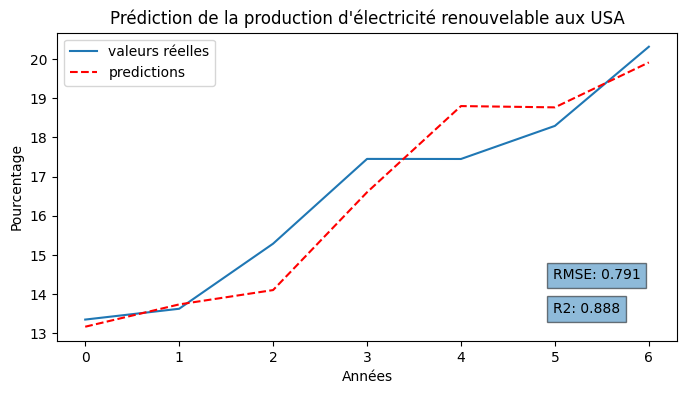

In [64]:
# tracer les prévisions par rapport aux valeurs réelles
pyplot.figure(figsize=(8, 4))

pyplot.plot(test)
pyplot.plot(predictions, color='red', linestyle='dashed')
# rajouter les valurs de r^2 et rmse sur le graphique 
pyplot.text(0.8, 0.09, 'R2: %.3f' % r2, bbox=dict( alpha=0.5), transform=pyplot.gca().transAxes)
pyplot.text(0.8, 0.20, 'RMSE: %.3f' % rmse, bbox=dict( alpha=0.5), transform=pyplot.gca().transAxes)

# titre du graphique
pyplot.title('Prédiction de la production d\'électricité renouvelable aux USA')

# titre axe 
pyplot.xlabel('Années')
pyplot.ylabel('Pourcentage')
pyplot.legend(['valeurs réelles', 'predictions'])
pyplot.show()

[13.737283281431274, 14.103309701362827, 16.60000799917819, 18.800546455949547, 18.767776099295784, 19.914898260522765]


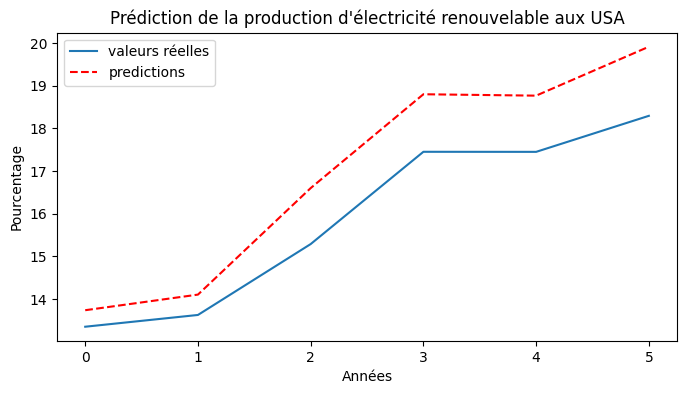

In [65]:
# prediction pour l'année n-1 

predictions = predictions[1:]
print(predictions)
test = test[:-1]

pyplot.figure(figsize=(8, 4))

pyplot.plot(test)
pyplot.plot(predictions, color='red', linestyle='dashed')

# titre du graphique
pyplot.title('Prédiction de la production d\'électricité renouvelable aux USA')

# titre axe 
pyplot.xlabel('Années')
pyplot.ylabel('Pourcentage')
pyplot.legend(['valeurs réelles', 'predictions'])
pyplot.show()

